In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding="latin1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [18]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country', 'provstate':'State','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType','nkill':'Killed','nwound':'Wounded','target1':'Target', 'summary':'Summary','gname':'Group','targtype1_txt':'TargetType','weaptype1_txt':'WeaponType','motive':'Motive'}, inplace=True)

data = data[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','AttackType','Killed','Wounded','Target','Summary','Group','TargetType','WeaponType','Motive']]

data.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,TargetType,WeaponType,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [19]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   Latitude    177135 non-null  float64
 8   Longitude   177134 non-null  float64
 9   AttackType  181691 non-null  object 
 10  Killed      171378 non-null  float64
 11  Wounded     165380 non-null  float64
 12  Target      181055 non-null  object 
 13  Summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  TargetType  181691 non-null  object 
 16  WeaponType  181691 non-null  object 
 17  Motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [21]:
print(data.info)

<bound method DataFrame.info of         Year  Month  Day  ...                   TargetType  WeaponType Motive
0       1970      7    2  ...  Private Citizens & Property     Unknown    NaN
1       1970      0    0  ...      Government (Diplomatic)     Unknown    NaN
2       1970      1    0  ...          Journalists & Media     Unknown    NaN
3       1970      1    0  ...      Government (Diplomatic)  Explosives    NaN
4       1970      1    0  ...      Government (Diplomatic)  Incendiary    NaN
...      ...    ...  ...  ...                          ...         ...    ...
181686  2017     12   31  ...                     Military    Firearms    NaN
181687  2017     12   31  ...                     Military  Explosives    NaN
181688  2017     12   31  ...  Private Citizens & Property  Incendiary    NaN
181689  2017     12   31  ...         Government (General)  Explosives    NaN
181690  2017     12   31  ...                      Unknown  Explosives    NaN

[181691 rows x 18 columns]>


In [22]:
data.shape

(181691, 18)

In [23]:
data.columns.values

array(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City',
       'Latitude', 'Longitude', 'AttackType', 'Killed', 'Wounded',
       'Target', 'Summary', 'Group', 'TargetType', 'WeaponType', 'Motive'],
      dtype=object)

In [24]:
data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Target           636
Summary        66129
Group              0
TargetType         0
WeaponType         0
Motive        131130
dtype: int64

In [25]:
data["Country"].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [26]:
data['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

In [27]:
data['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [28]:
data.corr()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
Latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
Longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


In [29]:
data['Year'].value_counts().head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

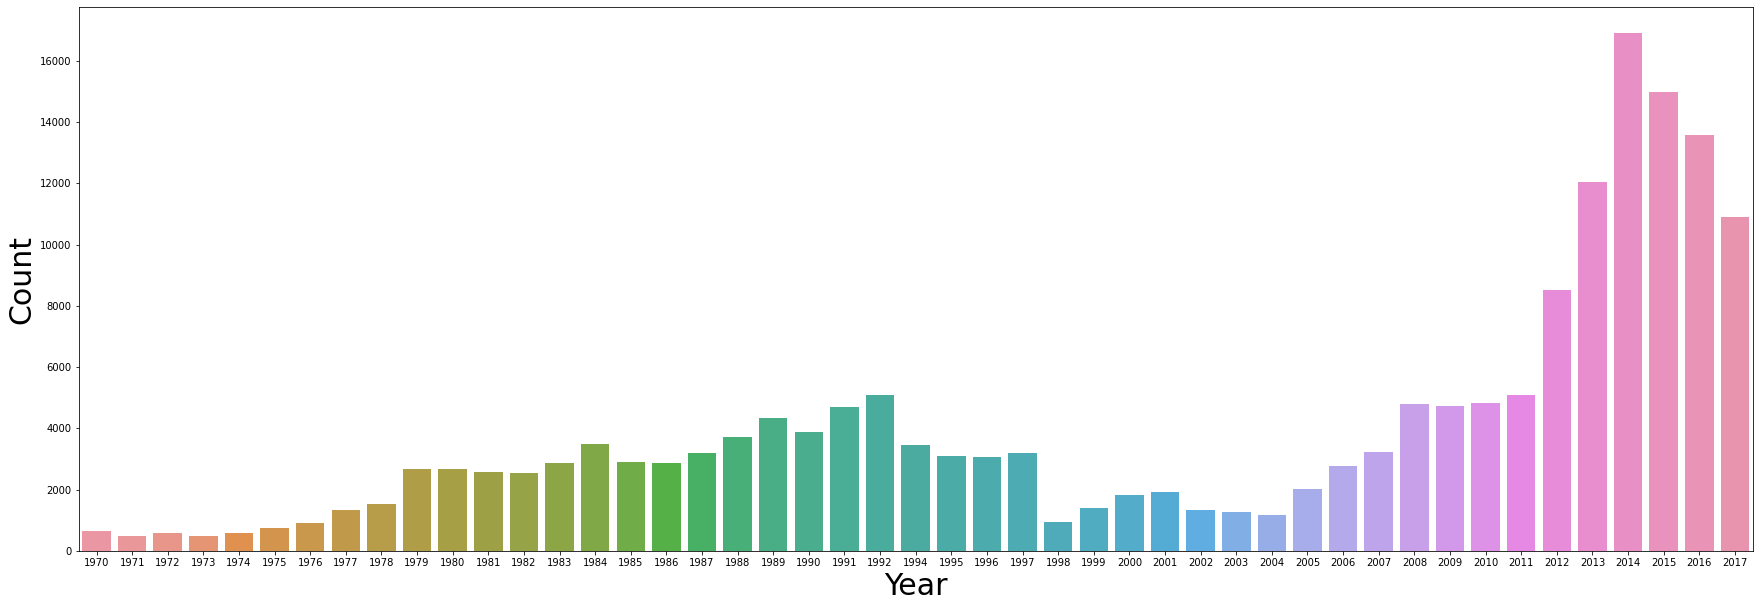

In [30]:
plt.figure(figsize=(30,10))
sns.countplot(data = data, x = 'Year')
plt.xlabel("Year",size=30)
plt.ylabel("Count",size=30)
plt.show()

In [31]:
data['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

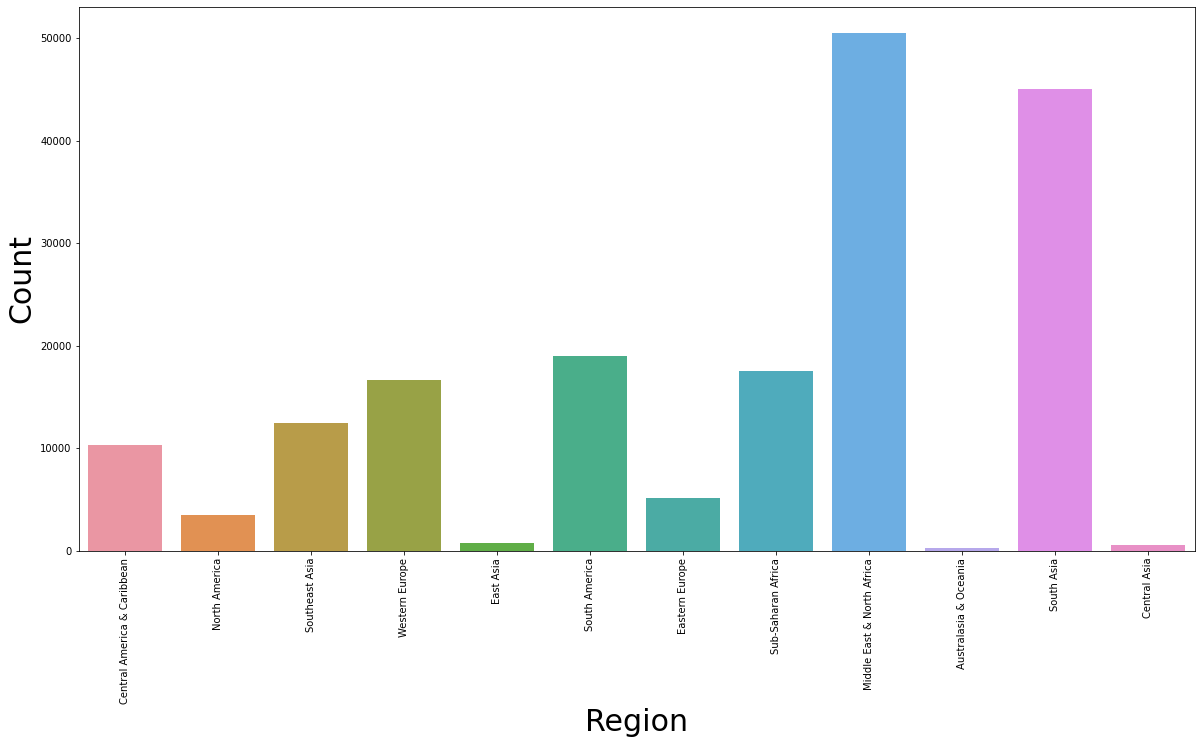

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(data = data, x = 'Region')
plt.xticks(rotation = 90)
plt.xlabel("Region",size=30)
plt.ylabel("Count",size=30)
plt.show()


In [33]:
data['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


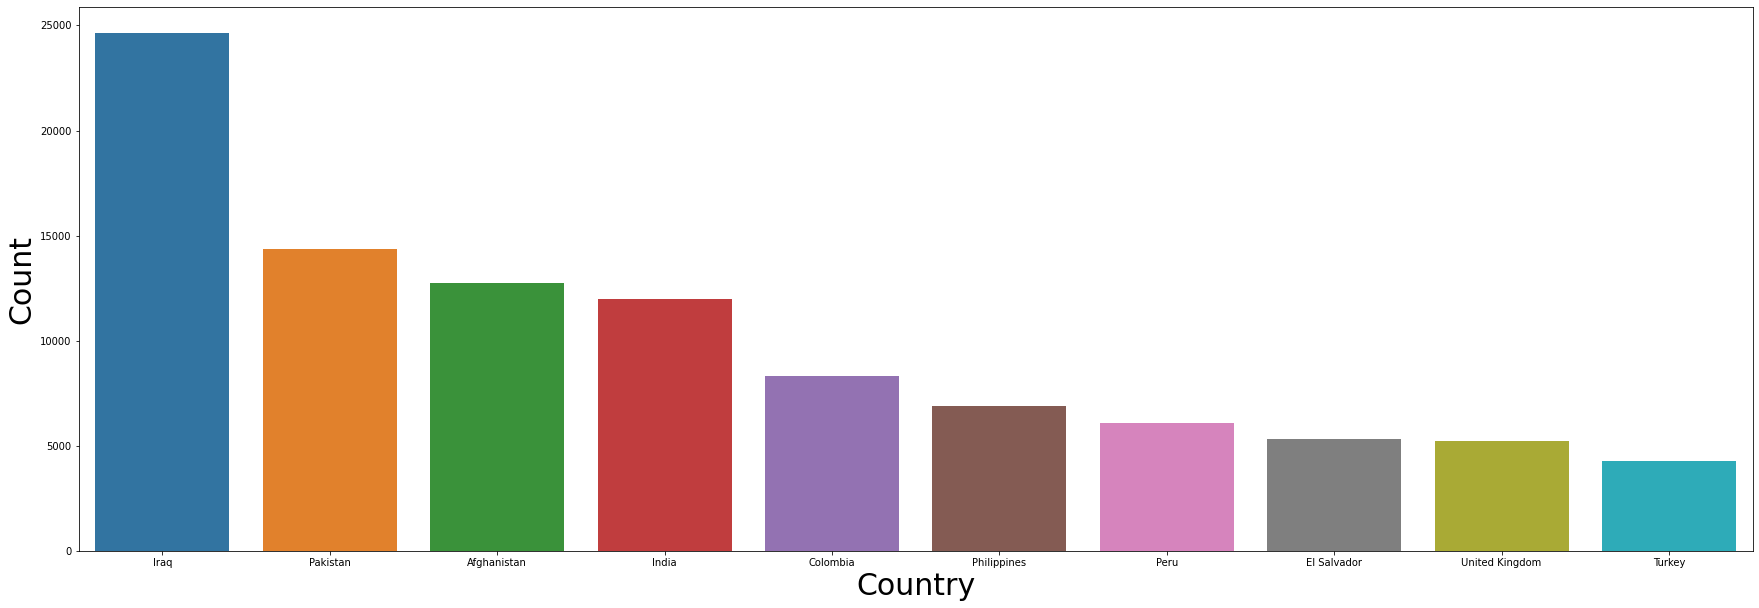

In [34]:
plt.figure(figsize=(30,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values)
plt.xlabel("Country",size=30)
plt.ylabel("Count",size=30)
plt.show()

## Affected Cities

In [35]:
data['City'].value_counts().head(10)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

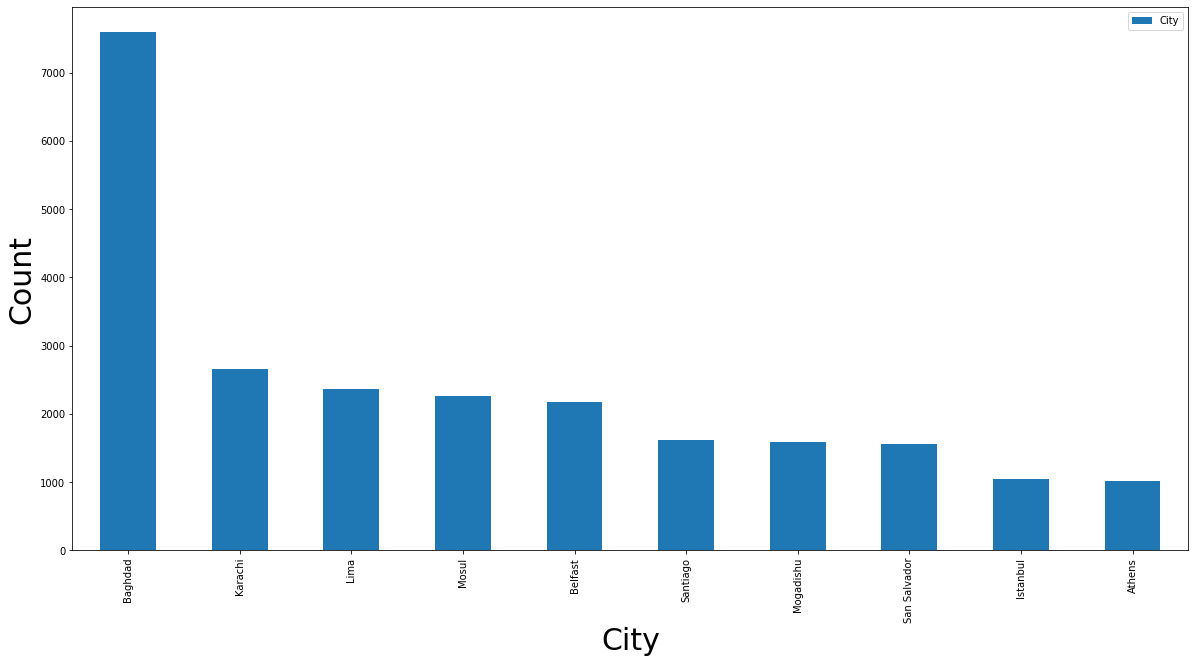

In [36]:
data['City'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,10))
plt.xlabel("City",size=30)
plt.ylabel("Count",size=30)
plt.show()

In [37]:
data['TargetType'].value_counts().head(10)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: TargetType, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


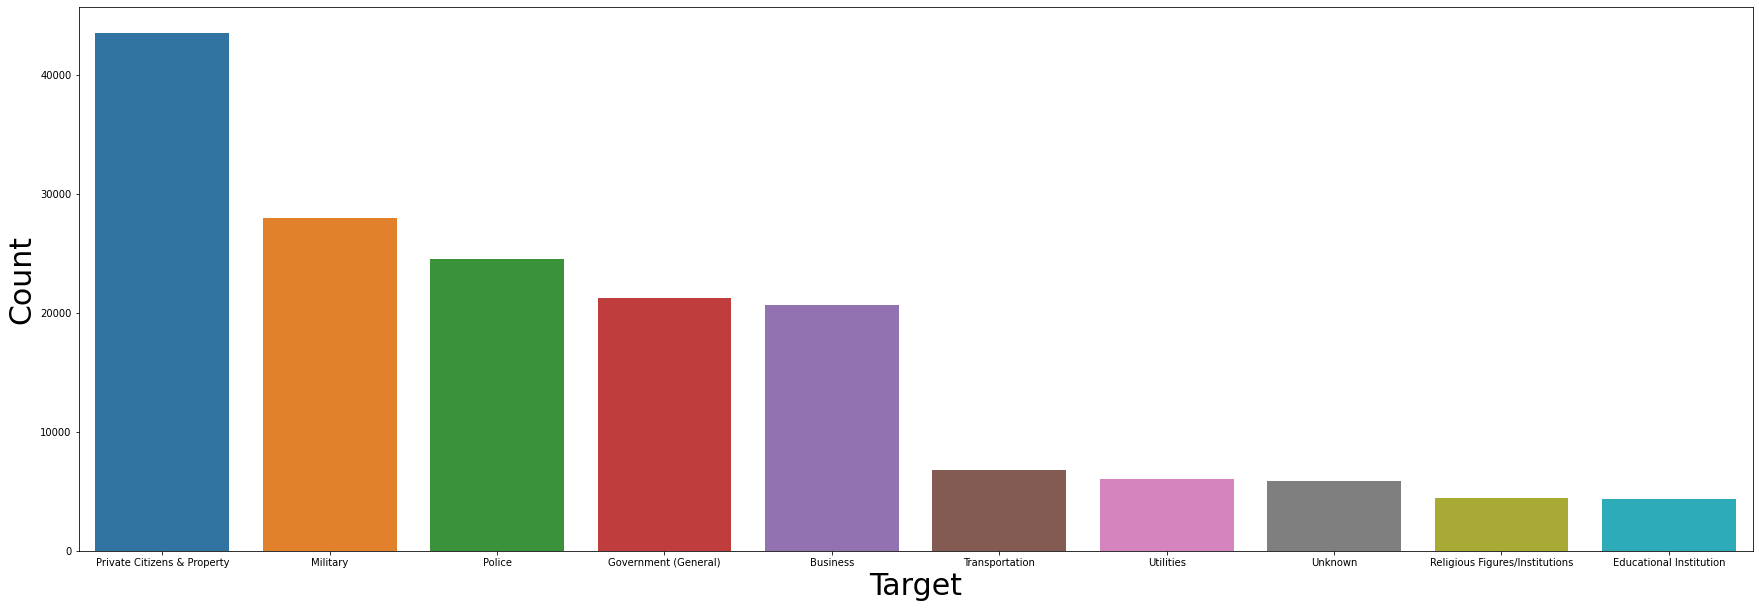

In [38]:
plt.figure(figsize=(30,10))
sns.barplot(data['TargetType'].value_counts()[:10].index,data['TargetType'].value_counts()[:10].values)
plt.xlabel("Target",size=30)
plt.ylabel("Count",size=30)
plt.show()

In [39]:
data['AttackType'].value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

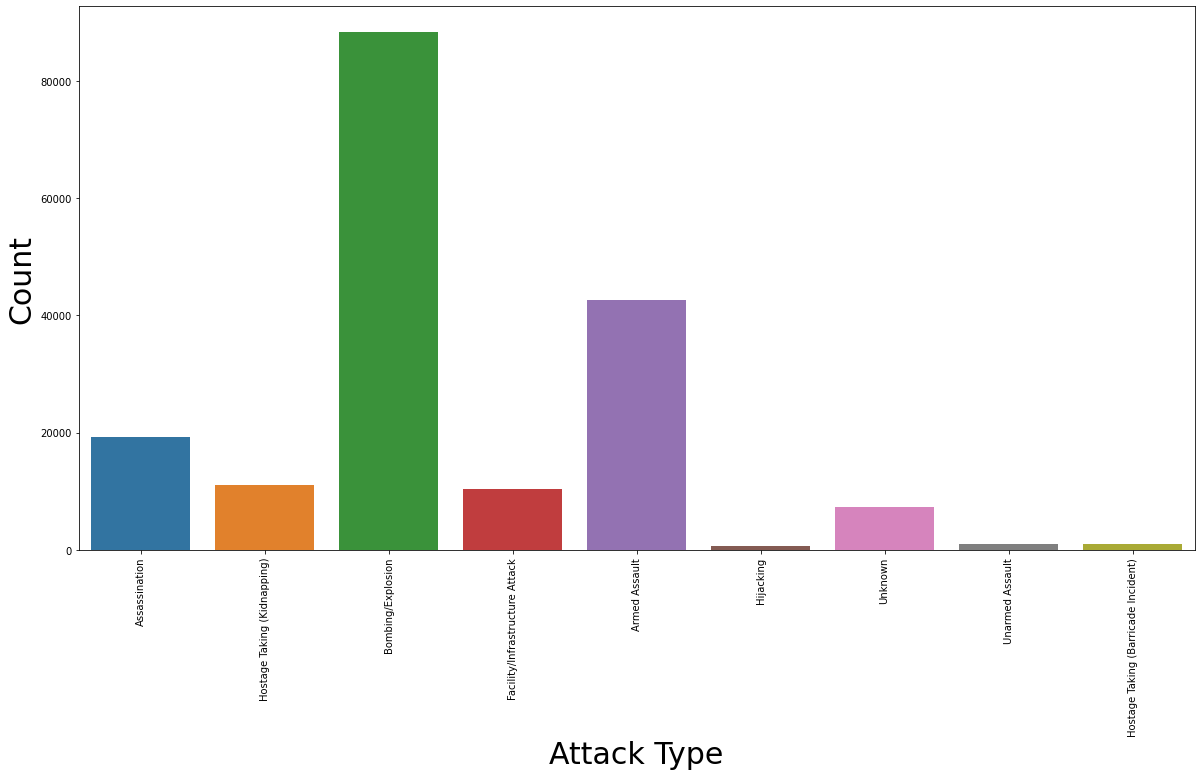

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(data = data, x = 'AttackType')
plt.xticks(rotation = 90)
plt.xlabel("Attack Type",size=30)
plt.ylabel("Count",size=30)
plt.show()


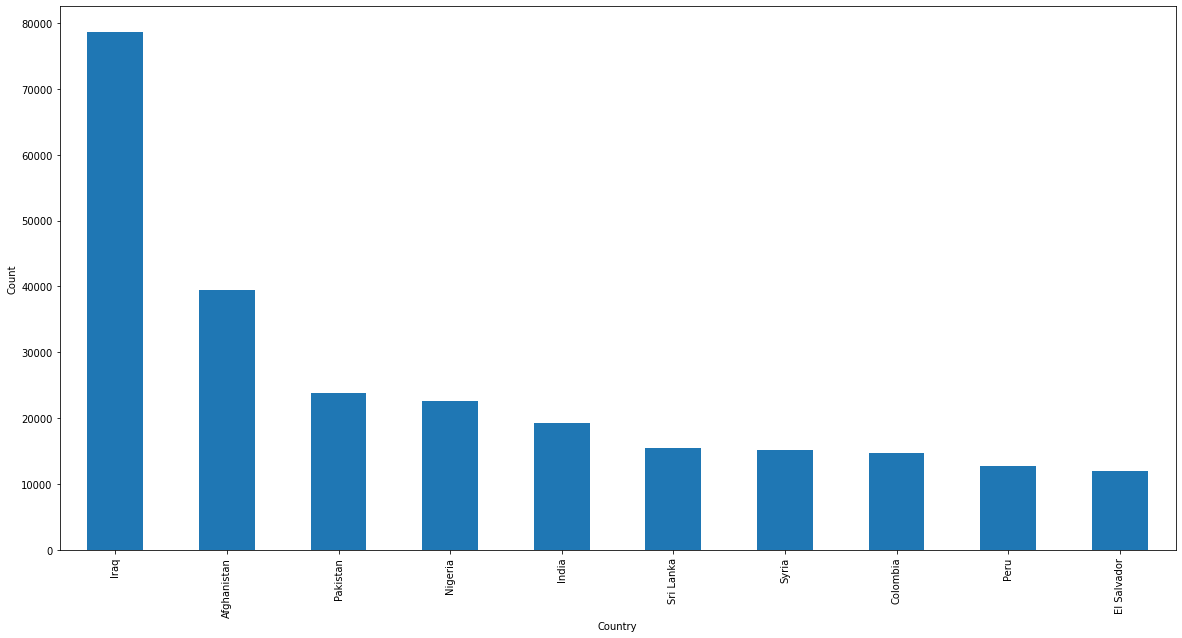

In [41]:
plt.figure(figsize=(20,10))
data.groupby('Country')['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [42]:
data['Group'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

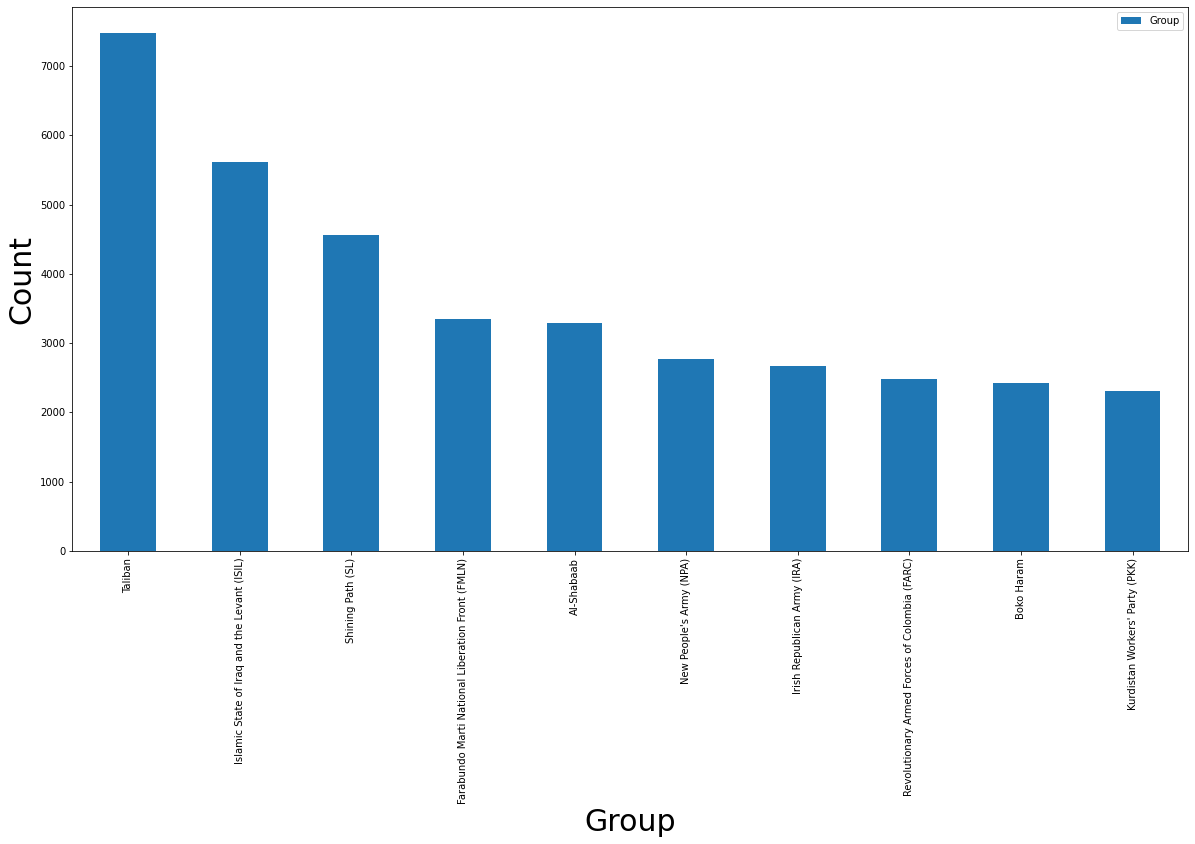

In [43]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,10))
plt.xticks(rotation = 90)
plt.xlabel("Group",size=30)
plt.ylabel("Count",size=30)
plt.show()

## Conclusion

Most active year of terrorism - 2014

Most affected region - Middle East & North Africa 

Most affected country - Iraq

Most affected city - Baghdad

Most targeted place - Private citizens and property

Major type of attack used - Bombing/Explosion

Country where more number of people killed - Iraq  

Most involved terrorist group - Taliban